11
['C:\\Users\\lesch\\Desktop\\ADICCPIAEV - Back-End\\ADICCPIAEV REST-WS API\\notebooks\\..\\data\\charls_1_1572712156_raw.fif', 'C:\\Users\\lesch\\Desktop\\ADICCPIAEV - Back-End\\ADICCPIAEV REST-WS API\\notebooks\\..\\data\\charls_26_1573472898_raw.fif', 'C:\\Users\\lesch\\Desktop\\ADICCPIAEV - Back-End\\ADICCPIAEV REST-WS API\\notebooks\\..\\data\\charls_27_1573472924_raw.fif', 'C:\\Users\\lesch\\Desktop\\ADICCPIAEV - Back-End\\ADICCPIAEV REST-WS API\\notebooks\\..\\data\\charls_28_1573472965_raw.fif', 'C:\\Users\\lesch\\Desktop\\ADICCPIAEV - Back-End\\ADICCPIAEV REST-WS API\\notebooks\\..\\data\\charls_2_1572712308_raw.fif', 'C:\\Users\\lesch\\Desktop\\ADICCPIAEV - Back-End\\ADICCPIAEV REST-WS API\\notebooks\\..\\data\\charls_3_1572712445_raw.fif', 'C:\\Users\\lesch\\Desktop\\ADICCPIAEV - Back-End\\ADICCPIAEV REST-WS API\\notebooks\\..\\data\\charls_4_1572712503_raw.fif', 'C:\\Users\\lesch\\Desktop\\ADICCPIAEV - Back-End\\ADICCPIAEV REST-WS API\\notebooks\\..\\data\\charls_5_157328

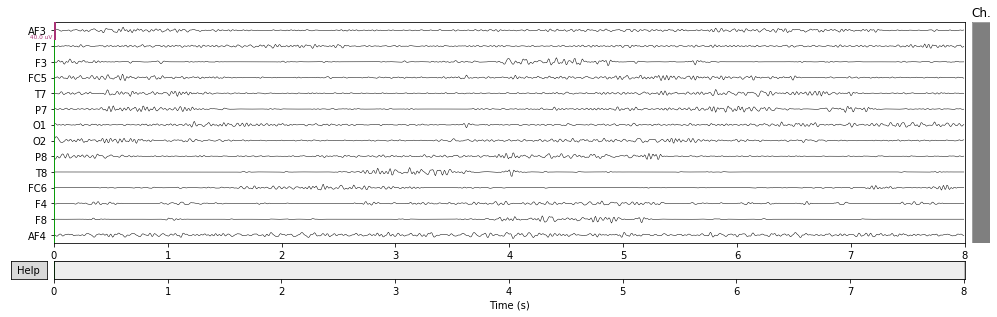

Opening raw data file C:\Users\lesch\Desktop\ADICCPIAEV - Back-End\ADICCPIAEV REST-WS API\notebooks\..\data\charls_26_1573472898_raw.fif...
    Range : 0 ... 1024 =      0.000 ...     8.000 secs
Ready.
Reading 0 ... 1024  =      0.000 ...     8.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 211 samples (1.648 sec)



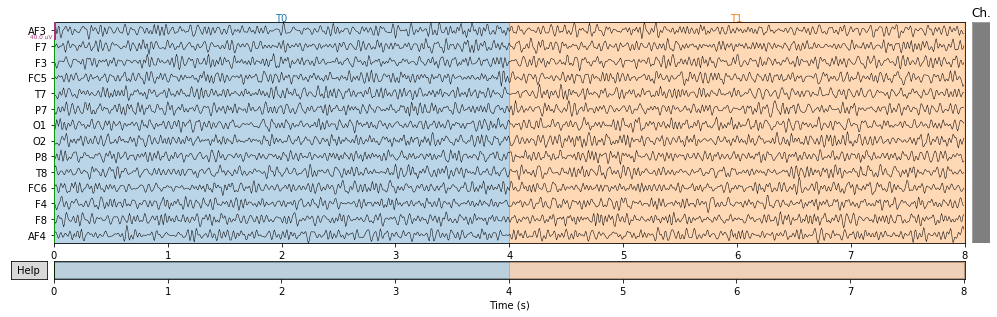

Opening raw data file C:\Users\lesch\Desktop\ADICCPIAEV - Back-End\ADICCPIAEV REST-WS API\notebooks\..\data\charls_27_1573472924_raw.fif...
    Range : 0 ... 1024 =      0.000 ...     8.000 secs
Ready.
Reading 0 ... 1024  =      0.000 ...     8.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 211 samples (1.648 sec)



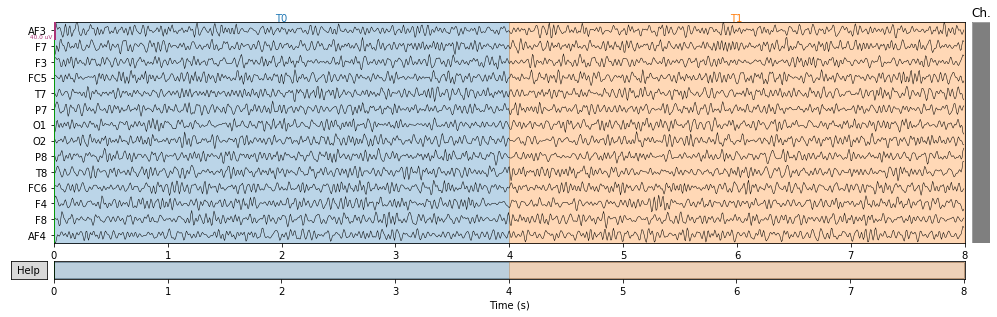

In [2]:
from os import getcwd, listdir
from os.path import isfile, join
import mne
import matplotlib.pyplot as plt

def normalize_data(channel):
    channel = (channel - 4200) / 10 ** 6
    return channel

mypath = join(getcwd(), "..\\cortex\\data")
mypath = join(getcwd(), "..\\data")

only_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
trials_files = [join(mypath, f) for f in only_files if ".fif" in f]

print(len(trials_files))
print(trials_files)

for t in trials_files[:3]:
    raw = mne.io.read_raw_fif(t)
    raw.load_data()
    raw.apply_function(normalize_data)
    raw.filter(7., 30., fir_design='firwin', skip_by_annotation='edge')
    raw.plot()
